In [4]:
# To avoid warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Mounting the data from google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# importing necessary packages
import glob
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img


model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150, 150,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# the model so far outputs 3D feature maps (height, width, features)

In [7]:
model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))  # fully connect ANN Network
model.add(Activation('relu'))
model.add(Dropout(0.5))  # Generalizing (avoiding overfitting)
model.add(Dense(1))
model.add(Activation('softmax'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [8]:
batch_size = 5

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/cigarette/train',  # this is the target directory
        target_size=(150, 150),  # all images will be resized to 150x150
        batch_size=batch_size,
        class_mode='categorical')  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/cigarette/validation',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='categorical')

Found 36 images belonging to 3 classes.
Found 0 images belonging to 0 classes.


In [9]:
model.fit(
        train_generator,
        steps_per_epoch=len(train_generator) // batch_size,
        epochs=100,
        validation_data=validation_generator,
        validation_steps=len(validation_generator) // batch_size)

Epoch 1/100
1/1 [==============================] - 44s 44s/step - loss: 0.6950 - accuracy: 0.3333
Epoch 2/100
1/1 [==============================] - 1s 1s/step - loss: 0.7878 - accuracy: 0.3333
Epoch 3/100
1/1 [==============================] - 1s 660ms/step - loss: 0.6657 - accuracy: 0.3333
Epoch 4/100
1/1 [==============================] - 1s 937ms/step - loss: 0.6428 - accuracy: 0.3333
Epoch 5/100
1/1 [==============================] - 0s 406ms/step - loss: 0.6515 - accuracy: 0.3333
Epoch 6/100
1/1 [==============================] - 1s 881ms/step - loss: 0.6671 - accuracy: 0.3333
Epoch 7/100
1/1 [==============================] - 0s 55ms/step - loss: 0.6474 - accuracy: 0.3333
Epoch 8/100
1/1 [==============================] - 0s 235ms/step - loss: 0.6500 - accuracy: 0.3333
Epoch 9/100
1/1 [==============================] - 0s 197ms/step - loss: 0.6689 - accuracy: 0.3333
Epoch 10/100
1/1 [==============================] - 0s 28ms/step - loss: 0.6415 - accuracy: 0.3333
Epoch 11/100
1/

In [10]:
model.save_weights('/content/drive/MyDrive/weights/cnn_weights4.h6') # always save your weights after training or during training

In [11]:
model.load_weights('/content/drive/MyDrive/weights/cnn_weights4.h6')

In [12]:
img = load_img('/content/drive/MyDrive/cigarette/validation/goldflake.jpg')  # this is a PIL image
x = img_to_array(img.resize([150,150]))  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

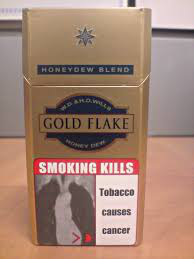

In [13]:
img

In [14]:
if (model.predict_classes(x)==0):
    print ("It is black")
elif (model.predict_classes(x)==1):
    print ("It is a camel")
else:
  print('It is goldflake')

It is a camel
